Better using Google Colabs
 or open this site
__https://github.com/aji-ptn/CNN_for_MNIST_Handwritten_Digit_Classification__

# Season 1 Loading the MNIST dataset in Keras

# Import dependencies
- __tensorflow__ - for developing and training ML models.
- __matplotlib__ - for plotting the data.
- __seaborn__ - for plotting confusion matrix.
- __numpy__ - for linear algebra operations.
- __pandas__ - for displaying training/test data in a table.
- __math__ - for calculating square roots etc.
- __datetime__ - for generating a logs folder names.

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
# import seaborn as sn
import numpy as np
import pandas as pd
import math
import datetime
import platform

print('Python version:', platform.python_version())
print('Tensorflow version:', tf.__version__)
print('Keras version:', tf.keras.__version__)

Python version: 3.6.9
Tensorflow version: 2.3.0
Keras version: 2.4.0


# Load the data
The training dataset consists of 60000 28x28px images of hand-written digits from 0 to 9.

The test dataset consists of 10000 28x28px images.

In [ ]:
mnist_dataset = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist_dataset.load_data()

In [ ]:
print('x_train:', x_train.shape)
print('y_train:', y_train.shape)
print('x_test:', x_test.shape)
print('y_test:', y_test.shape)

x_train: (60000, 28, 28)
y_train: (60000,)
x_test: (10000, 28, 28)
y_test: (10000,)


In [ ]:
# Save image parameters to the constants that we will use later for data re-shaping and for model traning.
(_, IMAGE_WIDTH, IMAGE_HEIGHT) = x_train.shape
IMAGE_CHANNELS = 1

print('IMAGE_WIDTH:', IMAGE_WIDTH);
print('IMAGE_HEIGHT:', IMAGE_HEIGHT);
print('IMAGE_CHANNELS:', IMAGE_CHANNELS);

IMAGE_WIDTH: 28
IMAGE_HEIGHT: 28
IMAGE_CHANNELS: 1


# Explore the data
Here is how each image in the dataset looks like. It is a 28x28 matrix of integers (from 0 to 255). Each integer represents a color of a pixel.

In [ ]:
pd.DataFrame(x_train[8])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,5,63,197,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,0,20,254,230,24,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0,0,20,254,254,48,0,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,0,0,20,254,255,48,0,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,0,0,20,254,254,57,0,0,0,0,0,0,0,0,0,0,0,0


This matrix of numbers may be drawn as follows:

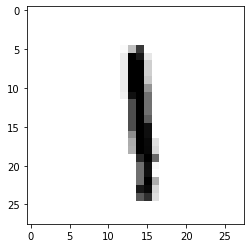

In [ ]:
plt.imshow(x_train[8], cmap=plt.cm.binary)
plt.show()

Let's print some more training examples to get the feeling of how the digits were written.

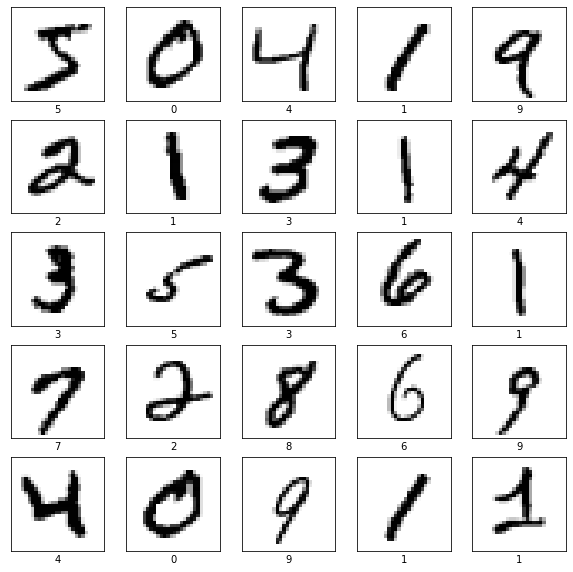

In [ ]:
numbers_to_display = 25
num_cells = math.ceil(math.sqrt(numbers_to_display))
plt.figure(figsize=(10,10))
for i in range(numbers_to_display):
    plt.subplot(num_cells, num_cells, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
plt.show()

# Reshaping the data
In order to use convolution layers we need to reshape our data and add a color channel to it. As you've noticed currently every digit has a shape of (28, 28) which means that it is a 28x28 matrix of color values form 0 to 255. We need to reshape it to (28, 28, 1) shape so that each pixel potentially may have multiple channels (like Red, Green and Blue).

In [ ]:
x_train_with_chanels = x_train.reshape(
    x_train.shape[0],
    IMAGE_WIDTH,
    IMAGE_HEIGHT,
    IMAGE_CHANNELS
)

x_test_with_chanels = x_test.reshape(
    x_test.shape[0],
    IMAGE_WIDTH,
    IMAGE_HEIGHT,
    IMAGE_CHANNELS
)

In [ ]:
print('x_train_with_chanels:', x_train_with_chanels.shape)
print('x_test_with_chanels:', x_test_with_chanels.shape)

x_train_with_chanels: (60000, 28, 28, 1)
x_test_with_chanels: (10000, 28, 28, 1)


# Normalize the data
Here we're just trying to move from values range of [0...255] to [0...1].

In [ ]:
x_train_normalized = x_train_with_chanels / 255
x_test_normalized = x_test_with_chanels / 255

In [ ]:
# Let's check just one row from the 0th image to see color chanel values after normalization.
x_train_normalized[0][18]

array([[0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.18039216],
       [0.50980392],
       [0.71764706],
       [0.99215686],
       [0.99215686],
       [0.81176471],
       [0.00784314],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ]])

# Build the model
We will use __Sequential__ Keras model.

Then we will have two pairs of __Convolution2D__ and __MaxPooling2D__ layers. The MaxPooling layer acts as a sort of downsampling using max values in a region instead of averaging.

After that we will use __Flatten__ layer to convert multidimensional parameters to vector.

The las layer will be a __Dense__ layer with 10 __Softmax__ outputs. The output represents the network guess. The 0-th output represents a probability that the input digit is 0, the 1-st output represents a probability that the input digit is 1 and so on...

In [ ]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Convolution2D(
    input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS),
    kernel_size=5,
    filters=8,
    strides=1,
    activation=tf.keras.activations.relu,
    kernel_initializer=tf.keras.initializers.VarianceScaling()
))

model.add(tf.keras.layers.MaxPooling2D(
    pool_size=(2, 2),
    strides=(2, 2)
))

model.add(tf.keras.layers.Convolution2D(
    kernel_size=5,
    filters=16,
    strides=1,
    activation=tf.keras.activations.relu,
    kernel_initializer=tf.keras.initializers.VarianceScaling()
))

model.add(tf.keras.layers.MaxPooling2D(
    pool_size=(2, 2),
    strides=(2, 2)
))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(
    units=128,
    activation=tf.keras.activations.relu
));

model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Dense(
    units=10,
    activation=tf.keras.activations.softmax,
    kernel_initializer=tf.keras.initializers.VarianceScaling()
))

Here is our model summary so far.

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 8)         208       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 8)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 8, 16)          3216      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 256)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               32896     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0

In order to plot the model the graphviz should be installed. For Mac OS it may be installed using brew like brew install graphviz.

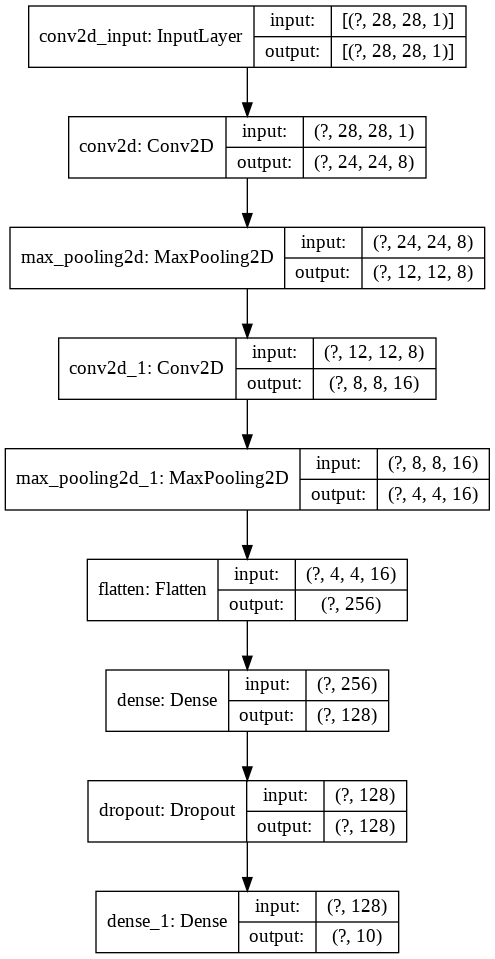

In [ ]:
tf.keras.utils.plot_model(
    model,
    show_shapes=True,
    show_layer_names=True,
)

# Compile the model

In [ ]:
adam_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(
    optimizer=adam_optimizer,
    loss=tf.keras.losses.sparse_categorical_crossentropy,
    metrics=['accuracy']
)

# Train the model

In [ ]:
log_dir=".logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

training_history = model.fit(
    x_train_normalized,
    y_train,
    epochs=10,
    validation_data=(x_test_normalized, y_test),
    callbacks=[tensorboard_callback]
)

Epoch 1/10
   1/1875 [..............................] - ETA: 0s - loss: 2.3227 - accuracy: 0.1250WARNING:tensorflow:From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
1875/1875 [==============================] - 31s 16ms/step - loss: 0.2111 - accuracy: 0.9349 - val_loss: 0.0561 - val_accuracy: 0.9839
Epoch 2/10
1875/1875 [==============================] - 31s 17ms/step - loss: 0.0708 - accuracy: 0.9782 - val_loss: 0.0457 - val_accuracy: 0.9841
Epoch 3/10
1875/1875 [==============================] - 31s 16ms/step - loss: 0.0516 - accuracy: 0.9843 - val_loss: 0.0414 - val_accuracy: 0.9863
Epoch 4/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0426 - accuracy: 0.9868 - val_loss: 0.0321 - val_accuracy: 0.9897
Epoch 5/10
1875/1875 [==============================

Let's see how the loss function was changing during the training. We expect it to get smaller and smaller on every next epoch.

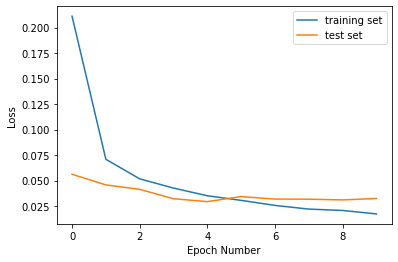

In [ ]:
plt.xlabel('Epoch Number')
plt.ylabel('Loss')
plt.plot(training_history.history['loss'], label='training set')
plt.plot(training_history.history['val_loss'], label='test set')
plt.legend()

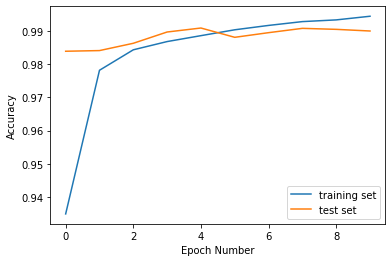

In [ ]:
plt.xlabel('Epoch Number')
plt.ylabel('Accuracy')
plt.plot(training_history.history['accuracy'], label='training set')
plt.plot(training_history.history['val_accuracy'], label='test set')
plt.legend()

# Evaluate model accuracy
We need to compare the accuracy of our model on training set and on test set. We expect our model to perform similarly on both sets. If the performance on a test set will be poor comparing to a training set it would be an indicator for us that the model is overfitted and we have a "high variance" issue.

##  Training set accuracy

In [ ]:
%%capture
train_loss, train_accuracy = model.evaluate(x_train_normalized, y_train)

In [ ]:
print('Training loss: ', train_loss)
print('Training accuracy: ', train_accuracy)

Training loss:  0.01016218215227127
Training accuracy:  0.9964666962623596


## Test set accuracy

In [ ]:
%%capture
validation_loss, validation_accuracy = model.evaluate(x_test_normalized, y_test)

In [ ]:
print('Validation loss: ', validation_loss)
print('Validation accuracy: ', validation_accuracy)

Validation loss:  0.03242797404527664
Validation accuracy:  0.9900000095367432


# Save the model

We will save the entire model to a HDF5 file. The .h5 extension of the file indicates that the model shuold be saved in Keras format as HDF5 file. To use this model on the front-end we will convert it (later in this notebook) to Javascript understandable format (tfjs_layers_model with .json and .bin files) using tensorflowjs_converter as it is specified in the main README.

In [ ]:
model_name = 'digits_recognition_cnn.h5'
model.save(model_name, save_format='h5')
loaded_model = tf.keras.models.load_model(model_name)

In [ ]:
loaded_model = tf.keras.models.load_model(model_name)

# Use the model (do predictions)
To use the model that we've just trained for digits recognition we need to call predict() method.

In [ ]:
predictions_one_hot = loaded_model.predict([x_test_normalized])
print('predictions_one_hot:', predictions_one_hot.shape)

predictions_one_hot: (10000, 10)


Each prediction consists of 10 probabilities (one for each number from 0 to 9). We need to pick the digit with the highest probability since this would be a digit that our model most confident with.

In [ ]:
# Predictions in form of one-hot vectors (arrays of probabilities).
pd.DataFrame(predictions_one_hot)

,0,1,2,3,4,5,6,7,8,9
0,4.256840e-17,3.816688e-09,5.933868e-10,2.870218e-07,1.027923e-10,7.034460e-11,1.119873e-17,9.999998e-01,9.780019e-16,4.873625e-10
1,1.740128e-07,8.519440e-08,9.999996e-01,6.333217e-10,4.583125e-14,1.702551e-14,1.234613e-07,8.437057e-10,1.497655e-10,1.523783e-15
2,8.639790e-08,9.999872e-01,3.857929e-06,2.088353e-09,1.844493e-07,5.614817e-08,3.409741e-06,4.939418e-06,3.842780e-07,2.173785e-09
3,9.999977e-01,1.626137e-08,1.666371e-08,2.187321e-09,1.025655e-10,2.121781e-08,2.131844e-06,2.653706e-08,6.080138e-10,1.299450e-08
4,6.067000e-09,1.119969e-11,1.372881e-10,2.961766e-08,9.959940e-01,4.331434e-09,1.483426e-08,1.222498e-11,8.737659e-10,4.005989e-03
...,...,...,...,...,...,...,...,...,...,...
9995,3.322248e-15,8.272827e-11,1.000000e+00,1.518133e-10,5.239503e-16,9.551772e-20,2.186801e-16,2.736969e-08,4.920371e-15,4.560117e-17
9996,2.521779e-16,6.338315e-11,6.585189e-11,9.999999e-01,1.076681e-14,8.563789e-08,2.344849e-18,3.978494e-11,1.160703e-13,6.654633e-11
9997,1.237156e-21,1.567292e-14,1.778688e-19,1.297089e-19,1.000000e+00,1.356393e-15,5.465035e-18,6.562143e-15,1.406881e-11,3.597252e-12
9998,8.713539e-12,1.137880e-20,2.773559e-19,3.160277e-10,3.086633e-18,9.999956e-01,3.557643e-10,2.147686e-18,4.424697e-06,3.698069e-12


In [ ]:
# Let's extract predictions with highest probabilites and detect what digits have been actually recognized.
predictions = np.argmax(predictions_one_hot, axis=1)
pd.DataFrame(predictions)

,0
0,7
1,2
2,1
3,0
4,4
...,...
9995,2
9996,3
9997,4
9998,5


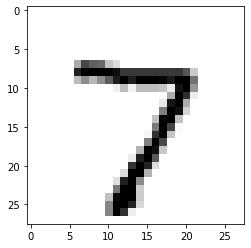

7


In [ ]:
plt.imshow(x_test_normalized[0].reshape((IMAGE_WIDTH, IMAGE_HEIGHT)), cmap=plt.cm.binary)
plt.show()
print(predictions[0])

We see that our model made a correct prediction and it successfully recognized digit 7. Let's print some more test examples and correspondent predictions to see how model performs and where it does mistakes.

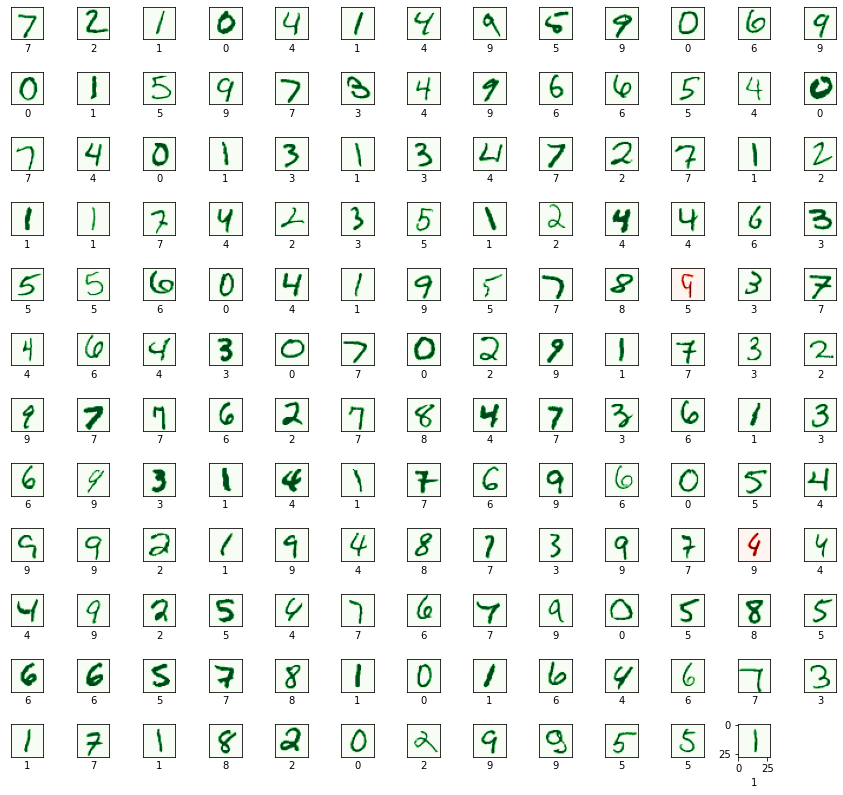

In [ ]:
numbers_to_display = 155
num_cells = math.ceil(math.sqrt(numbers_to_display))
plt.figure(figsize=(15, 15))

for plot_index in range(numbers_to_display):    
    predicted_label = predictions[plot_index]
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    color_map = 'Greens' if predicted_label == y_test[plot_index] else 'Reds'
    plt.subplot(num_cells, num_cells, plot_index + 1)
    plt.imshow(x_test_normalized[plot_index].reshape((IMAGE_WIDTH, IMAGE_HEIGHT)), cmap=color_map)
    plt.xlabel(predicted_label)

plt.subplots_adjust(hspace=1, wspace=0.5)
plt.show()

# Reference:
- https://colab.research.google.com/github/trekhleb/machine-learning-experiments/blob/master/experiments/digits_recognition_cnn/digits_recognition_cnn.ipynb#scrollTo=rzmsG8TxHOrl
- https://www.cs.ryerson.ca/~aharley/vis/conv/